In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as  sns
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

print("Libraries imported!")

Libraries imported!


In [2]:
# ml_data = ml_data[ml_data["Value"].map(len) > 2]
# df[df['column name'].map(len) < 2]
# ml_data.head

In [3]:
ml_data = pd.read_csv("fifa19_data.csv")
string_col = []
for i in range(54):
    if(i not in [3, 7, 8, 11]):
        string_col.append(i)
string_col.append(88)
clmns = list(ml_data)
for idx in string_col:
    ml_data = ml_data.drop(columns=clmns[idx])
ml_data.fillna(0, inplace=True)
ml_data.replace('NaN', 0)
for idx, item in enumerate(ml_data["Value"]):
    item = item[1:]
    if (item[-1] == '0'):
        item = 0
    elif (item[-1] == 'K'):
        item = float(item[:-1]) / 1000.0
    else:
        item = float(item[:-1])
    ml_data["Value"][idx] = item
print(ml_data.head)        

<ipython-input-3-d71ec76f3ab3>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ml_data["Value"][idx] = item


<bound method NDFrame.head of        Age  Overall  Potential  Value  Crossing  Finishing  HeadingAccuracy  \
0       31       94         94  110.5      84.0       95.0             70.0   
1       33       94         94     77      84.0       94.0             89.0   
2       26       92         93  118.5      79.0       87.0             62.0   
3       27       91         93     72      17.0       13.0             21.0   
4       27       91         92    102      93.0       82.0             55.0   
...    ...      ...        ...    ...       ...        ...              ...   
18202   19       47         65   0.06      34.0       38.0             40.0   
18203   19       47         63   0.06      23.0       52.0             52.0   
18204   16       47         67   0.06      25.0       40.0             46.0   
18205   17       47         66   0.06      44.0       50.0             39.0   
18206   16       46         66   0.06      41.0       34.0             46.0   

       ShortPassing  

In [4]:
X = ml_data
X = X.drop(["Value"], axis = 1)
y = ml_data[["Value"]]

In [5]:
clf = LinearRegression()
clf.fit(X, y)

LinearRegression()

In [6]:
y_pred = clf.predict(X)

In [7]:
print(mean_squared_error(y, y_pred))
print(r2_score(y, y_pred))

16.745459764666915
0.4650278168365106


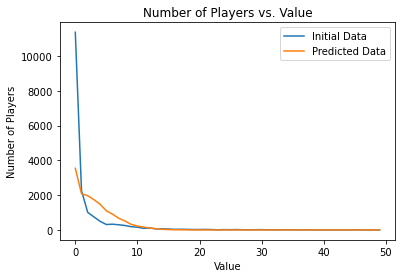

In [8]:
x_ax = [i for i in range(201)]
y_ax = [0] * 201
y_pred_ax = [0] * 201
for val in y["Value"]:
    y_ax[int(val)] += 1
for val in y_pred:
    y_pred_ax[int(val)] += 1
plt.plot(x_ax[:50], y_ax[:50])
plt.plot(x_ax[:50], y_pred_ax[:50])
plt.title("Number of Players vs. Value")
plt.xlabel("Value")
plt.ylabel("Number of Players")
plt.legend(["Initial Data", "Predicted Data"])

Text(0, 0.5, 'Overall Rating')

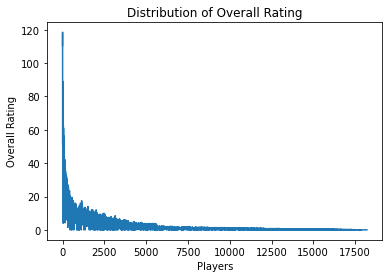

In [9]:
plt.plot(y)
plt.title("Distribution of Overall Rating")
plt.xlabel("Players")
plt.ylabel("Overall Rating")

In [10]:
pol = PolynomialFeatures(degree = 2)
X_poly = pol.fit_transform(X)

In [11]:
clf_po = LinearRegression()
clf.fit(X_poly, y)
y_pred = clf.predict(X_poly)

In [12]:
print(mean_squared_error(y, y_pred))
print(r2_score(y, y_pred))


4.345133629208007
0.861184723714826


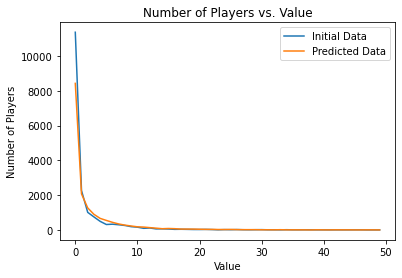

In [13]:
x_ax = [i for i in range(201)]
y_ax = [0] * 201
y_pred_ax = [0] * 201
for val in y["Value"]:
    y_ax[int(val)] += 1
for val in y_pred:
    y_pred_ax[int(val)] += 1
plt.plot(x_ax[:50], y_ax[:50])
plt.plot(x_ax[:50], y_pred_ax[:50])
plt.title("Number of Players vs. Value")
plt.xlabel("Value")
plt.ylabel("Number of Players")
plt.legend(["Initial Data", "Predicted Data"])